# Installation and setup

In [63]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
cd "/content/gdrive/My Drive/Face Recognition"

/content/gdrive/My Drive/Face Recognition


In [6]:
!pwd

/content/gdrive/My Drive/Face Recognition


In [65]:
!pip install face_recognition

## HOG features

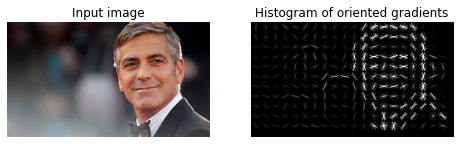

In [66]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2

#read image from disk
image = cv2.imread('clooney_2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#fd is the feature-descriptor(used to represent the image)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16), 
                    cells_per_block=(1,1), visualize=True, multichannel=True)

#plot input and hog image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title("Input image")

#Rescale histogram image for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title("Histogram of oriented gradients")
plt.show()

          

In [20]:
len(fd)

1760

In [22]:
image.shape

(186, 330, 3)

## Face Detection

In [44]:
import face_recognition
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle, Circle
import numpy as np
import cv2  #Open CV
%matplotlib inline


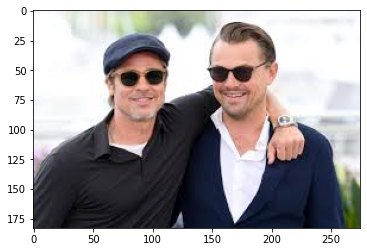

In [67]:
#Load the jpg file into a numpy array
image_1 = cv2.imread('c_and_unknown.jpg')
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
plt.imshow(image_1)


In [68]:
#Find all face in the image
face_locations = face_recognition.face_locations(image_1)
number_of_faces = len(face_locations)
print("Found {} face(s) in input image.", format(number_of_faces))

Found {} face(s) in input image. 2


A face is located at pixel location Top: 141, Left: 32, Bottom: 193,  Right: 84
A face is located at pixel location Top: 69, Left: 46, Bottom: 112,  Right: 89


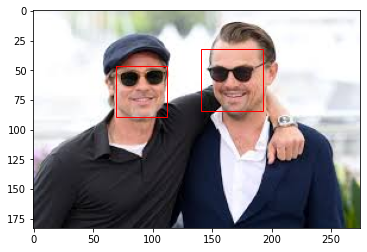

In [69]:
#get axis handle
plt.imshow(image_1)
ax = plt.gca()

#repeat for all faces found
for face_location in face_locations:
  #Print the locations of each face in the image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
  top, right, bottom, left = face_location
  x,y,w,h = left, top, right, bottom
  print("A face is located at pixel location Top: {}, Left: {}, Bottom: {},  Right: {}".format(x,y,w,h))

  #Let's draw a box around the face
  rect =Rectangle((x,y), w-x, h-y, fill=False, color='red')
  ax.add_patch(rect)

#show output image
plt.show()

## FACE RECOGNITION

In [70]:
import face_recognition
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle, Circle
import numpy as np
import cv2  #Open CV
%matplotlib inline


In [71]:
#Load the known images (create a dataset)

image = cv2.imread('person.jpg')
face_demo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

image = cv2.imread('clooney_1.jpg')
clooney = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('leo.jpg')
leo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

In [72]:
#Get face encoding for each person
face_demo_encoding = face_recognition.face_encodings(face_demo)[0]
clooney_encoding = face_recognition.face_encodings(clooney)[0]
leo_encoding = face_recognition.face_encodings(leo)[0]

#Create a database of all known face encodings
known_face_encodings = [
    face_demo_encoding,
    clooney_encoding,
    leo_encoding]



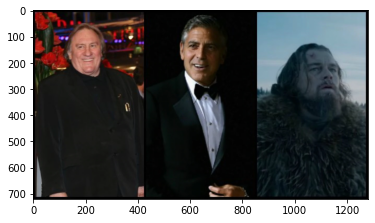

In [78]:
#Load the image we want to check
image = cv2.imread('collage.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(unknown_image)

#Get face encoding for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)



In [56]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:

  #results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance = 0.6)
  results = []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)
  threshold = 0.6
  results = np.array(results) <= threshold

  name = 'Unknown'

  if results[0]:
    name = "Face demo image"
  elif results[1]:
    name = "George Clooney"
  elif results[2]:
    name = "Leonardo DiCarpio"
  
  print(f"Found {name} in the photo!")



Found Unknown in the photo!
Found George Clooney in the photo!


In [54]:
results

array([False, False,  True])

## Playing with Facial landmarks

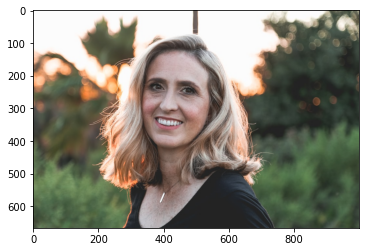

In [79]:
image = cv2.imread('women.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [75]:
face_landmarks_list = face_recognition.face_landmarks(image)

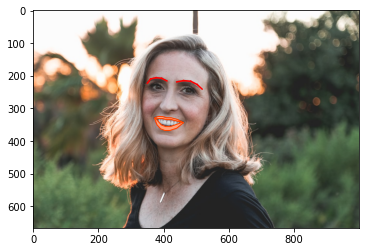

In [76]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x, pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color='red')
    ax.add_line(l)
    pre_x, pre_y = x,y

  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x, pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color='red')
    ax.add_line(l)
    pre_x, pre_y = x,y

  p = Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)
  p = Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)

plt.show()

